In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
from numpy import array

In [70]:
df = pd.read_csv("AMZN (2).csv")

In [71]:
df.head()

Date     Open     High      Low    Close  Adj Close    Volume
0  02-01-2015  15.6290  15.7375  15.3480  15.4260    15.4260  55664000
1  05-01-2015  15.3505  15.4190  15.0425  15.1095    15.1095  55484000
2  06-01-2015  15.1120  15.1500  14.6190  14.7645    14.7645  70380000
3  07-01-2015  14.8750  15.0640  14.7665  14.9210    14.9210  52806000
4  08-01-2015  15.0160  15.1570  14.8055  15.0230    15.0230  61768000

In [80]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Date'] = pd.to_datetime(df['Date'])

In [81]:
df.tail()

Date        Open        High         Low       Close   Adj Close  \
2265 2024-01-03  149.199997  151.050003  148.330002  148.470001  148.470001   
2266 2024-01-04  145.589996  147.380005  144.050003  144.570007  144.570007   
2267 2024-01-05  144.690002  146.589996  144.529999  145.240005  145.240005   
2268 2024-01-08  146.740005  149.399994  146.149994  149.100006  149.100006   
2269 2024-01-09  148.330002  151.710007  148.210007  151.369995  151.369995   

        Volume  
2265  49425500  
2266  56039800  
2267  45124800  
2268  46757100  
2269  43777500

In [82]:
# df1 = df.copy()

In [83]:
df1 = df.reset_index()['Close']

In [84]:
df1

0        15.426000
1        15.109500
2        14.764500
3        14.921000
4        15.023000
           ...    
2265    148.470001
2266    144.570007
2267    145.240005
2268    149.100006
2269    151.369995
Name: Close, Length: 2270, dtype: float64

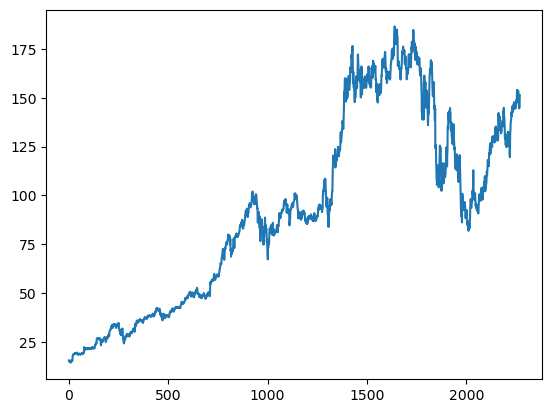

In [85]:
plt.plot(df1)

<Axes: >

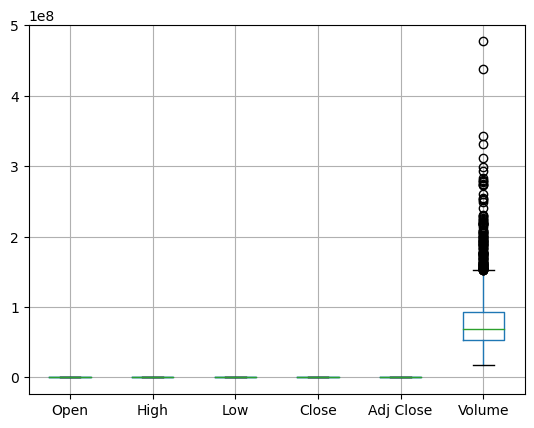

In [86]:
df.boxplot()

In [93]:
# Create time series plot
fig = go.Figure()

# Plot Open, High, Low, Close
fig.add_trace(go.Scatter(x=df['Date'], y=df['Open'], mode='lines', name='Open'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['High'], mode='lines', name='High'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Low'], mode='lines', name='Low'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close'))


In [88]:
# Create candlestick chart
fig.add_trace(go.Candlestick(x=df['Date'],
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'],
                             name='Candlesticks'))


In [13]:
# Customize layout
fig.update_layout(title='Historical Trends - OHLC and Volume',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  template='plotly_dark')

# Show the plot
fig.show()


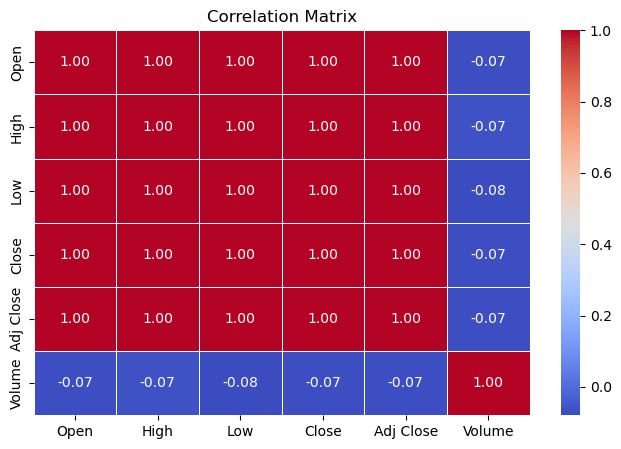

In [14]:
# Select relevant columns for correlation analysis
selected_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
selected_data = df[selected_columns]

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Plot the correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


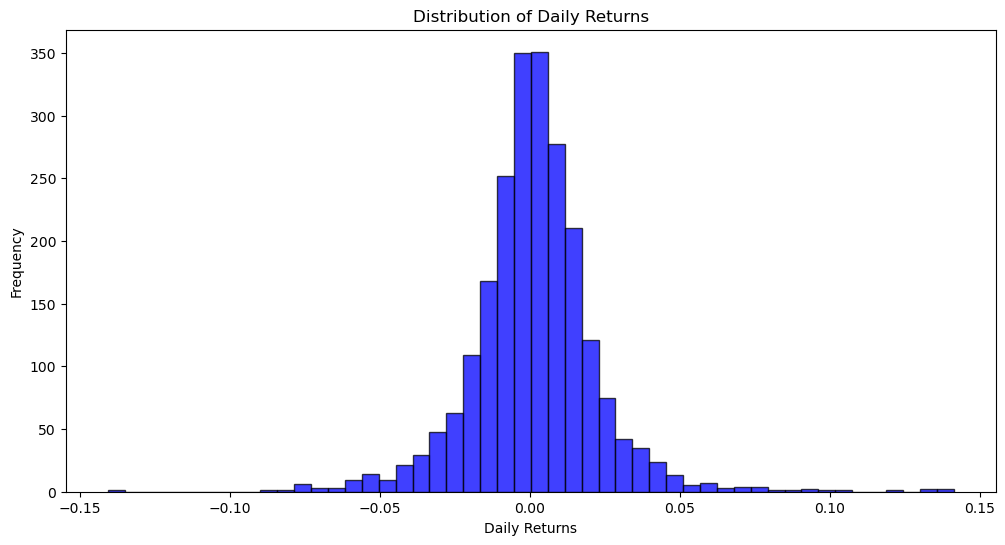

Summary Statistics of Daily Returns:
count    2269.000000
mean        0.001225
std         0.020949
min        -0.140494
25%        -0.008714
50%         0.001168
75%         0.011278
max         0.141311
Name: Close, dtype: float64


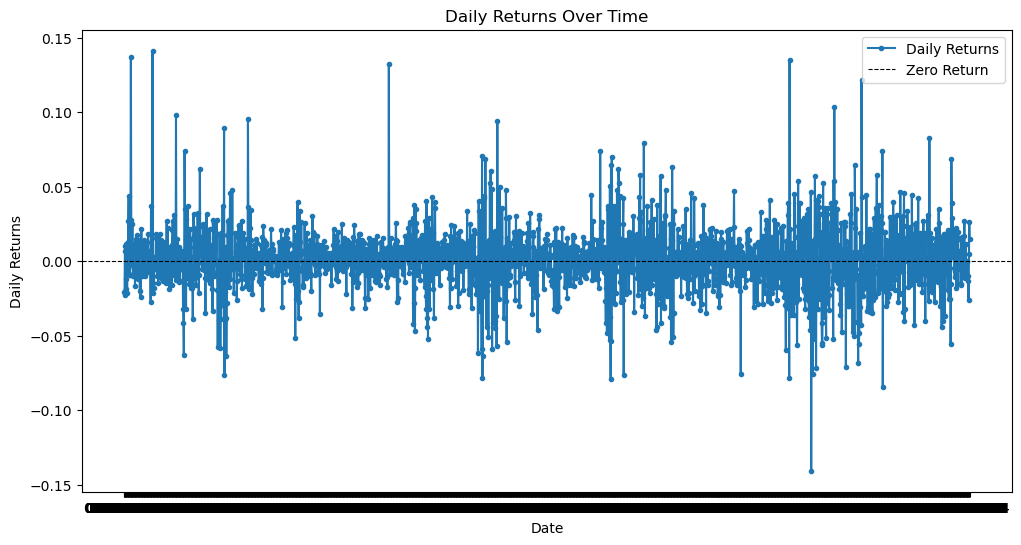

In [59]:
closing_prices = df['Close']

# Calculate daily returns
daily_returns = closing_prices.pct_change()

# Visualize the distribution of returns
plt.figure(figsize=(12, 6))
plt.hist(daily_returns[1:], bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

# Analyze summary statistics of returns
print("Summary Statistics of Daily Returns:")
print(daily_returns.describe())

# Look for patterns or anomalies in return data
plt.figure(figsize=(12, 6))
plt.plot(daily_returns.index, daily_returns, label='Daily Returns', linestyle='-', marker='o', markersize=3)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', label='Zero Return')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()


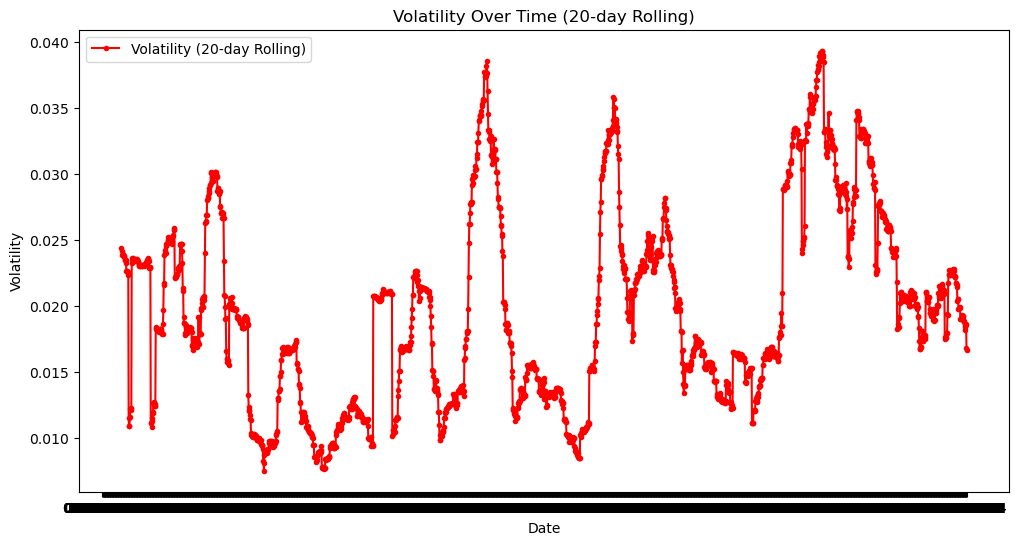

In [60]:
closing_prices = df['Close']

# Calculate daily returns
daily_returns = closing_prices.pct_change()

# Calculate rolling 20-day volatility
rolling_volatility = daily_returns.rolling(window=50).std()

# Visualize rolling volatility over time
plt.figure(figsize=(12, 6))
plt.plot(rolling_volatility.index, rolling_volatility, label='Volatility (20-day Rolling)', linestyle='-', marker='o', markersize=3, color='red')
plt.title('Volatility Over Time (20-day Rolling)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


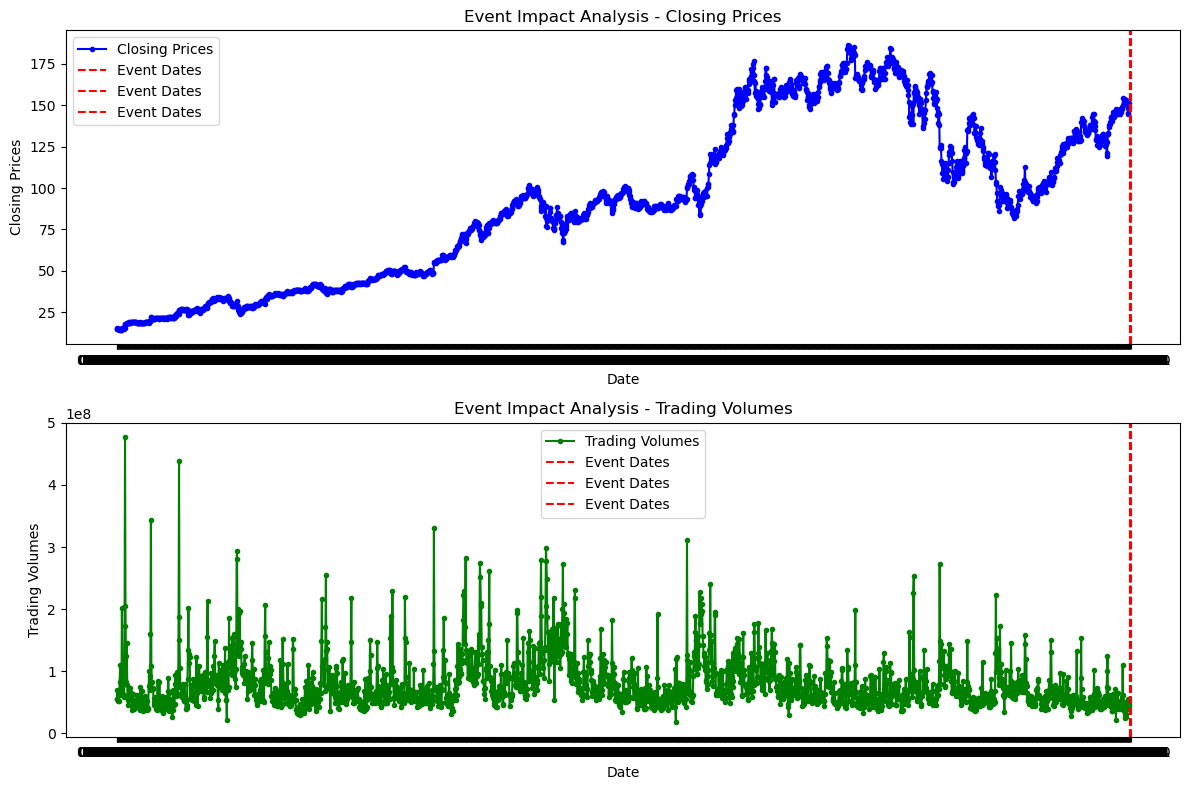

In [17]:
closing_prices = df['Close']
trading_volumes = df['Volume']

# Identify specific events (e.g., earnings announcements)
# For demonstration purposes, let's assume you have a list of event dates
event_dates = ['2022-01-31', '2022-04-30', '2022-07-31']

# Create event study plots
plt.figure(figsize=(12, 8))

# Plot closing prices around events
plt.subplot(2, 1, 1)
plt.plot(closing_prices, label='Closing Prices', linestyle='-', marker='o', markersize=3, color='blue')
for event_date in event_dates:
    plt.axvline(event_date, color='red', linestyle='--', label='Event Dates')
plt.title('Event Impact Analysis - Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend()

# Plot trading volumes around events
plt.subplot(2, 1, 2)
plt.plot(trading_volumes, label='Trading Volumes', linestyle='-', marker='o', markersize=3, color='green')
for event_date in event_dates:
    plt.axvline(event_date, color='red', linestyle='--', label='Event Dates')
plt.title('Event Impact Analysis - Trading Volumes')
plt.xlabel('Date')
plt.ylabel('Trading Volumes')
plt.legend()

plt.tight_layout()
plt.show()


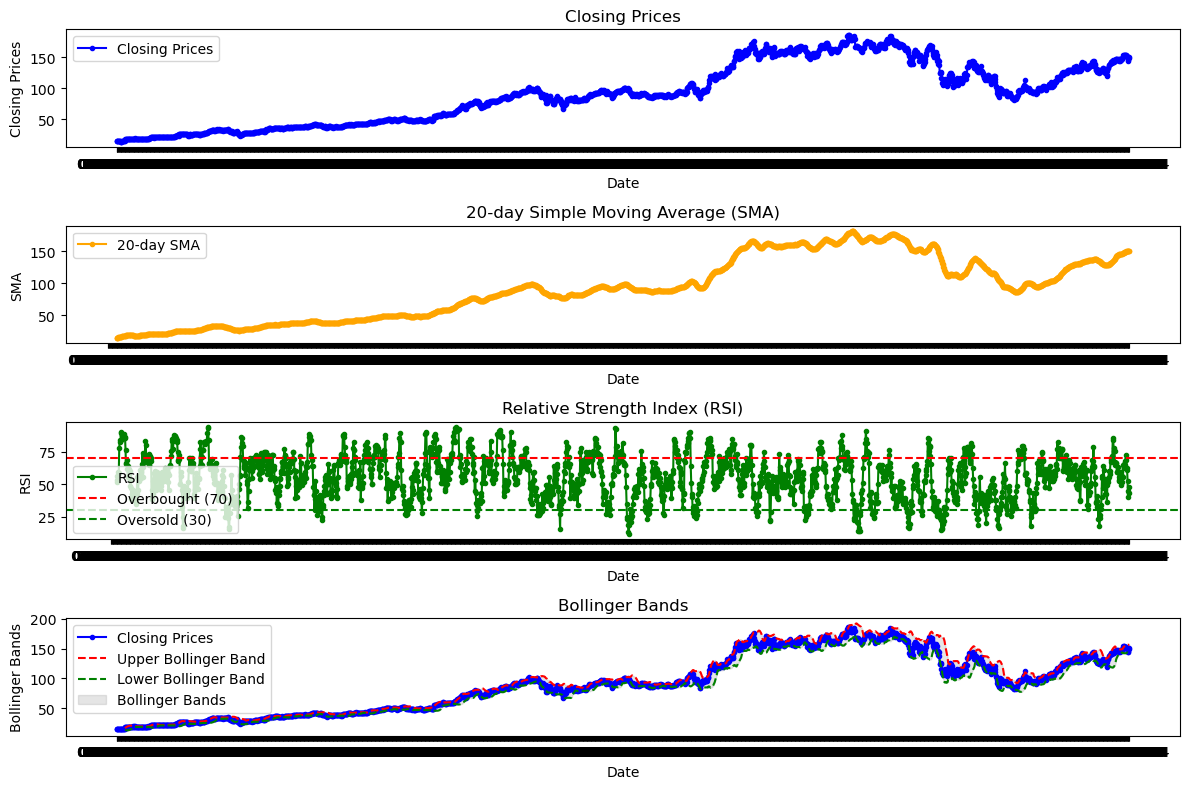

In [18]:
#'Close' is the column representing closing prices
closing_prices = df['Close']

# Calculate 20-day Simple Moving Average (SMA)
sma_20 = closing_prices.rolling(window=20).mean()

# Calculate 14-day Relative Strength Index (RSI)
delta = closing_prices.diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

average_gain = gain.rolling(window=14).mean()
average_loss = loss.rolling(window=14).mean()

rs = average_gain / average_loss
rsi = 100 - (100 / (1 + rs))

# Calculate Bollinger Bands
std_dev = closing_prices.rolling(window=20).std()
upper_band = sma_20 + 2 * std_dev
lower_band = sma_20 - 2 * std_dev

# Visualize the indicators and closing prices
plt.figure(figsize=(12, 8))

# Closing Prices
plt.subplot(4, 1, 1)
plt.plot(closing_prices, label='Closing Prices', linestyle='-', marker='o', markersize=3, color='blue')
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend()

# 20-day Simple Moving Average
plt.subplot(4, 1, 2)
plt.plot(sma_20, label='20-day SMA', linestyle='-', marker='o', markersize=3, color='orange')
plt.title('20-day Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('SMA')
plt.legend()

# Relative Strength Index (RSI)
plt.subplot(4, 1, 3)
plt.plot(rsi, label='RSI', linestyle='-', marker='o', markersize=3, color='green')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

# Bollinger Bands
plt.subplot(4, 1, 4)
plt.plot(closing_prices, label='Closing Prices', linestyle='-', marker='o', markersize=3, color='blue')
plt.plot(upper_band, label='Upper Bollinger Band', linestyle='--', color='red')
plt.plot(lower_band, label='Lower Bollinger Band', linestyle='--', color='green')
plt.fill_between(closing_prices.index, upper_band, lower_band, color='gray', alpha=0.2, label='Bollinger Bands')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Bollinger Bands')
plt.legend()

plt.tight_layout()
plt.show()


In [19]:
import numpy as  np


In [20]:
df1

0        15.426000
1        15.109500
2        14.764500
3        14.921000
4        15.023000
           ...    
2265    148.470001
2266    144.570007
2267    145.240005
2268    149.100006
2269    151.369995
Name: Close, Length: 2270, dtype: float64

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [22]:
df1.shape

(2270, 1)

In [23]:
df1

array([[0.00626223],
       [0.0044245 ],
       [0.00242128],
       ...,
       [0.76001758],
       [0.78243039],
       [0.79561091]])

In [24]:
# df1 = scaler.inverse_transform(df1)
# df1

In [25]:
#splitting
training_data = int(len(df1)*0.65)
testing_data = len(df1) - training_data
train_data,test_data = df1[0:training_data,:],df1[training_data:len(df1),:1]

In [26]:
training_data,testing_data

(1475, 795)

In [27]:
train_data,test_data

(array([[0.00626223],
        [0.0044245 ],
        [0.00242128],
        ...,
        [0.88113962],
        [0.87805346],
        [0.8293869 ]]),
 array([[0.79782323],
        [0.82754342],
        [0.81967282],
        [0.82505246],
        [0.82570561],
        [0.82704115],
        [0.81827339],
        [0.82162952],
        [0.81651408],
        [0.81622082],
        [0.82193147],
        [0.84138586],
        [0.84436749],
        [0.83644169],
        [0.85155003],
        [0.84674522],
        [0.84186784],
        [0.83485656],
        [0.83352687],
        [0.83912721],
        [0.81790766],
        [0.8171208 ],
        [0.82145534],
        [0.83322784],
        [0.83559397],
        [0.85761198],
        [0.85619519],
        [0.84619945],
        [0.84751461],
        [0.84761331],
        [0.84144398],
        [0.83779175],
        [0.87009576],
        [0.88113962],
        [0.87064445],
        [0.86224837],
        [0.84183878],
        [0.85109428],
        [0.827830

In [61]:
import numpy as np
#convert an array of values intot a adataset matrix
def create_dataset(dataset,time_step = 1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i + time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [29]:
time_step = 100
x_train,y_train = create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [30]:
print(x_train)

[[0.00626223 0.0044245  0.00242128 ... 0.0408424  0.0402153  0.04194271]
 [0.0044245  0.00242128 0.00332999 ... 0.0402153  0.04194271 0.04053466]
 [0.00242128 0.00332999 0.00392224 ... 0.04194271 0.04053466 0.04130691]
 ...
 [0.66359607 0.67596086 0.68342497 ... 0.79815122 0.78895677 0.8017106 ]
 [0.67596086 0.68342497 0.6871992  ... 0.78895677 0.8017106  0.85767001]
 [0.68342497 0.6871992  0.69330465 ... 0.8017106  0.85767001 0.88113962]]


In [31]:
print(x_test.shape),print(y_test.shape)
print(x_train.shape),print(y_train.shape)

(694, 100)
(694,)
(1374, 100)
(1374,)


(None, None)

In [32]:
#reshape input to fit for lstm
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)  #(1,1,1) 3 dimensional extra 1 for 3 dimension

In [33]:
#create stacked lstm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:
model= Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True,))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ lstm (LSTM)                        │ (None, 100, 50)               │      10,400 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_1 (LSTM)                      │ (None, 100, 50)               │      20,200 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_2 (LSTM)                      │ (None, 50)                    │      20,200 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense (Dense)                      │ (None, 1)                     │          51 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs =100,batch_size=64,verbose=1)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0613 - val_loss: 0.0038
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 9.6284e-04 - val_loss: 0.0038
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 7.0237e-04 - val_loss: 0.0028
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 5.8736e-04 - val_loss: 0.0026
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 6.3488e-04 - val_loss: 0.0030
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 5.7763e-04 - val_loss: 0.0025
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 6.5945e-04 - val_loss: 0.0025
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 6.4269e-04 - val_loss: 0.0024
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 6.1735e-04 - val_loss: 0.0030
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 5.2749e-04 - val_loss: 0.0039
Epoch 12/100
22/

In [39]:
import tensorflow as tf

In [40]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [41]:
# train_predict = scaler.inverse_transform(train_predict)
# test_predict = scaler.inverse_transform(test_predict)

In [42]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.011627831770502032

In [43]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.021959701574813587

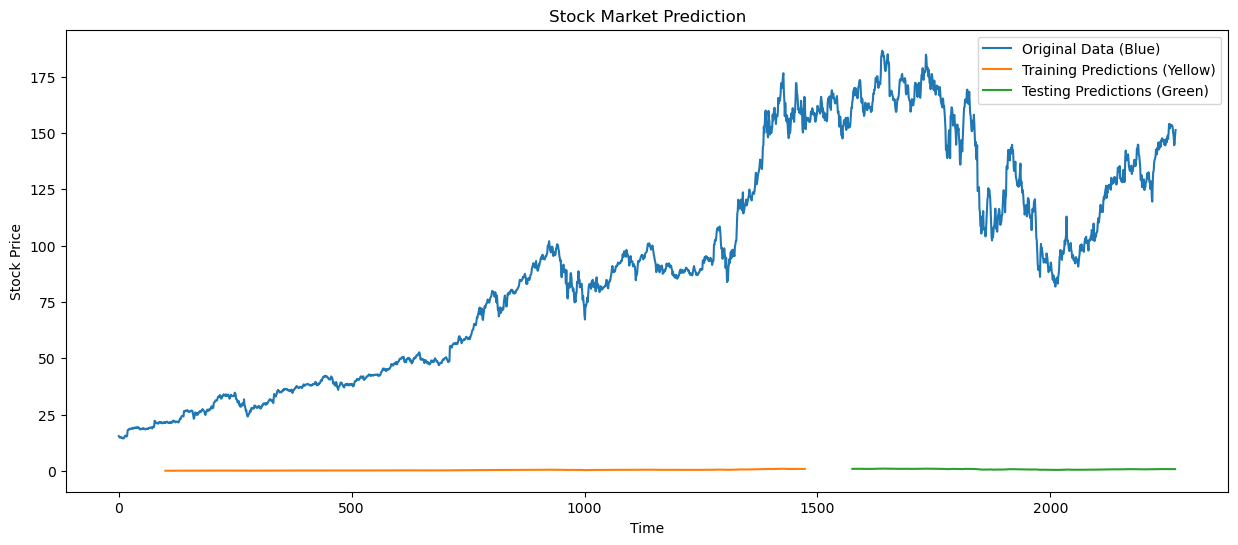

In [45]:
# ...

# Plotting baseline and predictions
plt.figure(figsize=(15, 6))

# Plotting the original data
plt.plot(scaler.inverse_transform(df1), label='Original Data (Blue)')

# Plotting training predictions in yellow
train_predict_plot = np.empty_like(df1)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict
plt.plot(train_predict_plot, label='Training Predictions (Yellow)')

# Plotting testing predictions in green
test_predict_plot = np.empty_like(df1)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(df1) - 1, :] = test_predict
plt.plot(test_predict_plot, label='Testing Predictions (Green)')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Market Prediction')
plt.legend()
plt.show()


In [47]:
len(test_data)

795

In [48]:
x_input = test_data[695:].reshape(1,-1)
x_input.shape

(1, 100)

In [49]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [50]:
temp_input

[0.6946371784172191,
 0.6902243240501983,
 0.6987016588655791,
 0.6962049365347238,
 0.703579120177424,
 0.6822114277933012,
 0.690456546232653,
 0.6897597983953315,
 0.7000372006070548,
 0.7009662461103626,
 0.7180370674773304,
 0.7186757742851018,
 0.7137403648465156,
 0.7026500746741162,
 0.71710810326398,
 0.7193144868992989,
 0.7475918372712551,
 0.7367337634748846,
 0.7577530819403467,
 0.7569982175899437,
 0.7318563834529971,
 0.7294757315683905,
 0.7158306838420115,
 0.7022435784359483,
 0.6676373345636143,
 0.6664179445583446,
 0.6789018116953441,
 0.6481858148606356,
 0.6481858148606356,
 0.6481858148606356,
 0.6548051399593583,
 0.6683921989140172,
 0.6408697070860386,
 0.6541083514770583,
 0.6480696631244297,
 0.6596825141748202,
 0.6614244186066767,
 0.6685082635538404,
 0.6821533983766025,
 0.6850566111392001,
 0.6703082380473744,
 0.6863340305611685,
 0.6800630793811065,
 0.6606696413526566,
 0.6622373123737785,
 0.6434825811531,
 0.6515535126331213,
 0.6631663636835119,

In [51]:
from numpy import array

lst_output=[]
n_steps =100
i=0
while(i<30):
      if(len(temp_input)>100):
            #print(temp_input)
            x_input = np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            x_input = x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps,1))
            #print(x_input)
            yhat = model.predict(x_input,verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
      else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
        
print(lst_output)

[0.7885704]
101
1 day input [0.69022432 0.69870166 0.69620494 0.70357912 0.68221143 0.69045655
 0.6897598  0.7000372  0.70096625 0.71803707 0.71867577 0.71374036
 0.70265007 0.7171081  0.71931449 0.74759184 0.73673376 0.75775308
 0.75699822 0.73185638 0.72947573 0.71583068 0.70224358 0.66763733
 0.66641794 0.67890181 0.64818581 0.64818581 0.64818581 0.65480514
 0.6683922  0.64086971 0.65410835 0.64806966 0.65968251 0.66142442
 0.66850826 0.6821534  0.68505661 0.67030824 0.68633403 0.68006308
 0.66066964 0.66223731 0.64348258 0.65155351 0.66316636 0.6215343
 0.61096661 0.65840509 0.68726308 0.68946946 0.71217261 0.71838552
 0.72146292 0.72808224 0.74532734 0.74166926 0.73307577 0.75026275
 0.7446305  0.76326917 0.74817243 0.74602408 0.75966913 0.7651853
 0.75223691 0.76855304 0.76872722 0.77447553 0.77041105 0.76628853
 0.76495299 0.77041105 0.75769496 0.76954012 0.75583695 0.76954012
 0.77267555 0.76379172 0.77302392 0.78092066 0.77267555 0.78748195
 0.81128833 0.80966245 0.79996573 0.

In [52]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [53]:
import matplotlib.pyplot as plt

In [54]:
len(df1)

2270

In [55]:
df3 = df1.tolist()
df3.extend(lst_output)

In [56]:
# Inverse transform the scaled data
original_data = scaler.inverse_transform(df1[2170:])
predicted_data = scaler.inverse_transform(lst_output)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


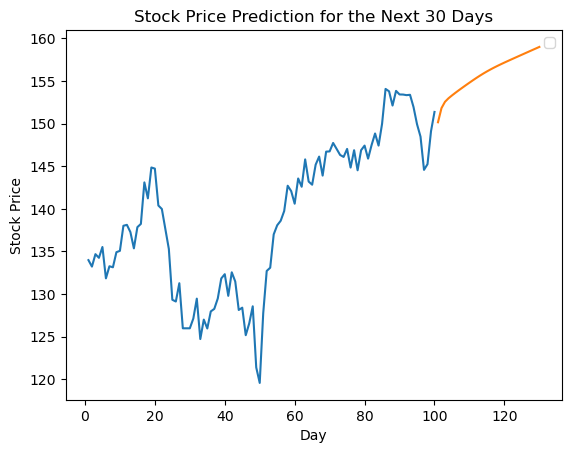

In [57]:
plt.plot(day_new,scaler.inverse_transform(df1[2170:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for the Next 30 Days')
plt.legend()
plt.show()

In [58]:
import plotly.graph_objects as go

# ...

# Convert data to lists for Plotly
day_new_list = np.arange(1, 101).tolist()
day_pred_list = np.arange(101, 131).tolist()
df3_list = scaler.inverse_transform(df1[2170:]).flatten().tolist()
lst_output_list = scaler.inverse_transform(lst_output).flatten().tolist()

# Create traces for the plot
trace1 = go.Scatter(x=day_new_list, y=df3_list, mode='lines', name='Actual Data')
trace2 = go.Scatter(x=day_pred_list, y=lst_output_list, mode='lines', name='Predicted Data')

# Layout settings
layout = go.Layout(title='Stock Market Prediction for the Next 30 Days',
                   xaxis=dict(title='Days'),
                   yaxis=dict(title='Stock Price'),
                   showlegend=True)

# Create the figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show the interactive plot
fig.show()
